In [46]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [35]:
data = pd.read_csv('./data.csv')
data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [36]:
X = data[['AT','V','AP','RH']]
y = data[['PE']]

In [37]:
from sklearn.cross_validation import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [39]:
from sklearn.linear_model import Ridge
# 指定超参 alpha = 1
ridge = Ridge(alpha=1)

In [40]:
ridge.fit(X_train,y_train)
print(ridge.intercept_,'\n',ridge.coef_)

[447.05552892] 
 [[-1.97373209 -0.2323016   0.06935852 -0.15806479]]


In [41]:
# ridge 回归的交叉验证选择最优参数
from sklearn.linear_model import RidgeCV
ridgeCV = RidgeCV(alphas =[0.1,0.5,1,5,10,20,50,100])
ridgeCV.fit(X_train,y_train)
print(ridgeCV.alpha_)

5.0


In [43]:
pred1 = ridge.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(pred1,y_test)))

4.4811169582038115


In [45]:
pred2 = ridgeCV.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,pred2)))

4.481120540971007


In [48]:
%matplotlib inline
X = 1. / (np.arange(1,11) + np.arange(0,10)[:,np.newaxis])
y = np.ones(10)

In [50]:
n_alphas = 200
alphas = np.logspace(-10,-2,n_alphas)
clf = linear_model.Ridge(fit_intercept = False)
coefs = []
for a in alphas:
    clf.set_params(alpha = a)
    clf.fit(X,y)
    coefs.append(clf.coef_)

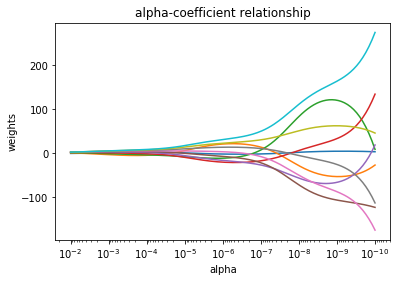

In [51]:
ax = plt.gca()
ax.plot(alphas ,coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('alpha-coefficient relationship')
plt.axis('tight')
plt.show()